# Исследование рынка российского кинопроката

Заказчик этого исследования — Министерство культуры Российской Федерации.

Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделим внимание фильмам, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю.

Мы будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

## Шаг 1. Просмотр информации 

In [52]:
# импортируем бибилиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [53]:
# считываем файлы
try:
    shows = pd.read_csv('/datasets/mkrf_shows.csv')
    movies = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    print('Мария забыла поменять путь')

In [54]:
# просмотрим информацию о датасетах
shows.info()
print()
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 

Можно объединить два датасета в один по столбцу `puNumber`. Предварительно изменим тип данных `puNumber` в **movies**.

In [55]:
# просмотрим значения столбца 
movies['puNumber'].sort_values()

804      111004112
3962     111000110
4768     111000111
729      111000112
1128     111000113
           ...    
4355     226017410
3992     226019110
1011     231001012
5249     231001111
1797           нет
Name: puNumber, Length: 7486, dtype: object

In [56]:
# заменим тип данных в столбце
movies['puNumber'] = pd.to_numeric(movies['puNumber'], errors='coerce')

# объединим таблицы в один датафрейм
data = movies.merge(shows, on='puNumber', how='outer')

# переименуем некорректно названный столбец
data = data.rename(
        columns={
            'puNumber': 'pu_number'
        })

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.0,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.0,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416.0,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.0,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.0,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


## Шаг 2. Предобработка данных. 

### Шаг 2.1. Преобразование типов данных. 

Изменим тип данных в столбце `pu_number`, т.к. номер не может быть вещественным числом, а также в столбце `show_start_date` заменим тип данных на *datetime*. 

In [57]:
# удалим пропуски 
data = data.dropna(subset='pu_number')

# преобразуем в целочисленный тип данных
data['pu_number'] = data['pu_number'].astype('int')

# преобразуем в формат даты
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%dT%H:%M:%S%Z')
data.head(3)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Изменим тип данных в столбце `rating`.

In [58]:
# просмотрим значения 
data['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

Предположим, что значения в процентах означают рейтинг фильма , не приведенный к общему виду. 

In [59]:
# заменим значения 
data['ratings'] = data['ratings'].replace(
        {'19%': '1.9',
         '28%': '2.8',
         '62%': '6.2',
         '64%': '6.4',
         '79%': '7.9',
         '83%': '8.3',
         '88%': '8.8',
         '89%': '8.9',
         '90%': '9.0',
         '91%': '9.1',
         '94%': '9.4',
         '97%': '9.7',
         '98%': '9.8',
         '99%': '9.9'          
        }
)

# заменим тип данных
data['ratings'] = data['ratings'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   pu_number              7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

### Шаг 2.2. Замена пропусков. 

In [60]:
# просмотрим долю пропусков в каждом столбце 
data.isna().mean() * 100

title                     0.000000
pu_number                 0.000000
show_start_date           0.000000
type                      0.000000
film_studio               0.240481
production_country        0.026720
director                  0.120240
producer                  7.588510
age_restriction           0.000000
refundable_support       95.564462
nonrefundable_support    95.564462
budget                   95.564462
financing_source         95.564462
ratings                  12.905812
genres                   13.026052
box_office               57.808951
dtype: float64

In [61]:
data[data['film_studio'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.0
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Предположим, что большинство пропусков возникли, потому что никакая студия не продюсировала фильм (авторское кино). Так как количество пропусков небольшое, оставим их как есть. 

In [62]:
data[data['production_country'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Страна производства этих фильмов - Россия. Заменим пропуски на нужное значение. 

In [63]:
data['production_country'] = data['production_country'].fillna('Россия')

Пропуски в значениях столбцов "Режиссер", "Продюсер", "Рейтинг", "Жанр" и "Сборы в прокате" мы не можем заменить, поэтому эти пропуски оставим без изменений. 

Пропуски с столбцах, связанных с государственной поддержкой, не нуждаются в замене, т.к. пропуск в этих столбцах значит, что государственной поддержки у фильма не было. 

### Шаг 2.3. Обработка дубликатов.  

In [64]:
# подсчитаем дубликаты 
data.duplicated().sum()

0

In [65]:
# просмотрим дубликаты по столбцам
data[data.duplicated(subset='title', keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


In [99]:
# просмотрим дубликаты по столбцам
display(data[data.duplicated(subset='pu_number', keep=False)])

# просмотрим значения столбца даты выхода в прокат
data['show_start_date'].sort_values().unique()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_of_premiere,main_director,main_genre,ratio_refundable_to_budget
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN,2010,Эрик Лартиго,мелодрама,NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN,2010,Зенке Вортманн,драма,NaN


<DatetimeArray>
['2010-01-11 12:00:00+00:00', '2010-01-13 12:00:00+00:00',
 '2010-01-14 12:00:00+00:00', '2010-01-15 12:00:00+00:00',
 '2010-01-18 12:00:00+00:00', '2010-01-19 12:00:00+00:00',
 '2010-01-20 12:00:00+00:00', '2010-01-21 12:00:00+00:00',
 '2010-01-25 12:00:00+00:00', '2010-01-26 12:00:00+00:00',
 ...
 '2019-12-17 12:00:00+00:00', '2019-12-19 12:00:00+00:00',
 '2019-12-20 12:00:00+00:00', '2019-12-21 12:00:00+00:00',
 '2019-12-23 12:00:00+00:00', '2019-12-24 12:00:00+00:00',
 '2019-12-26 12:00:00+00:00', '2019-12-27 12:00:00+00:00',
 '2019-12-28 12:00:00+00:00', '2019-12-30 12:00:00+00:00']
Length: 1964, dtype: datetime64[ns, UTC]

Дубликаты в столбце `title` связаны с повторным выходом фильма в прокат. Так как мы не хотим потерять номер прокатного удостоверения, с этими дубликатами мы ничего не можем сделать.

Дубликаты в столбе `pu_number` говорят о том, что под одним номером прокатного удостоверения в разное время могли выходить разные фильмы. Однако одинаковая дата выхода в прокат заставила меня проверить тщательнее. Мы увидели, что у нас нет данных до 11 января 2010 года. Получается, что наша догадка верна, и разные фильмы могли выходить под одним прокатным номером, но так как произошла ошибка при выгрузке данных, все фильмы, вышедшие до 2010 года, потеряли свою дату выхода в прокат. 

Фильмы со значением `title = 'Анализируй это!'` являются дубликатами. Судя по текущим данных КиноПоиска, строка под номером 5067 содержит правильные значения. Строку 5068 мы удалим. 

In [67]:
data = data.query('index != 5068')
data = data.reset_index(drop=True)

### Шаг 2.4. Обработка столбцов с категориальными переменными. 

Изучим столбцы `type`, `age_restriction`, `financing_source`, `genres`.

In [68]:
print(data['type'].unique())

# избавимся от лишних пробелов
data['type'] = data['type'].str.strip()

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']


In [69]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [70]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [71]:
data['genres'].sort_values().unique()

array(['аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', 'боевик,драм

Мы избавились от пробелов в столбце `type`. В других столбцах есть повторяющиеся значения в совокупности с другими. Это исправить или оптимизировать мы не можем. 

### Шаг 2.5. Обработка столбцов с количественными переменными. 

Изучим столбцы `refundable_support`, `nonrefundable_support`, `budget`, `box_office`.

In [72]:
# опишем функцию для количественных переменных
def desc_plot(the_column):
    display(data[data[the_column].isna() == False].head(3), data[the_column].describe())
    data.boxplot(column=the_column, figsize=(3,7)); 
    plt.show()
    data[the_column].hist(figsize=(16,3), bins=100);

# для удобства разделим "финансовые" столбцы на 1 млн
data['refundable_support'] = data['refundable_support'] / 1000000
data['nonrefundable_support'] = data['nonrefundable_support'] / 1000000
data['budget'] = data['budget'] / 1000000
data['box_office'] = data['box_office'] / 1000000


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26.500000,79.411900,Министерство культуры,8.1,"драма,мелодрама",0.365354
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26.000000,37.142857,Министерство культуры,NaN,NaN,0.028140
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107.847945,176.023490,Фонд кино,5.3,"комедия,фантастика",19.957031


count    332.000000
mean      11.864458
std       24.916555
min        0.000000
25%        0.000000
50%        0.000000
75%       15.000000
max      180.000000
Name: refundable_support, dtype: float64

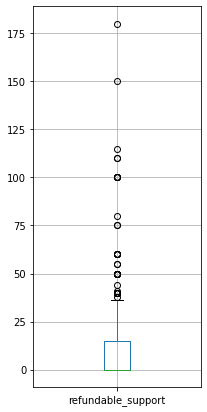

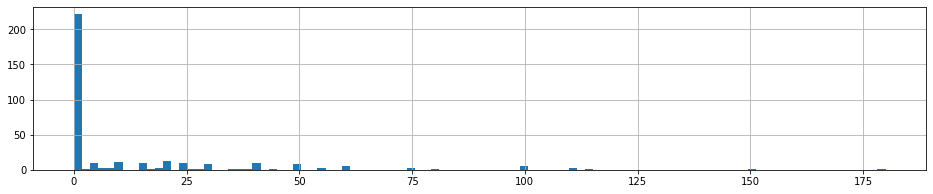

In [73]:
desc_plot('refundable_support')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26.500000,79.411900,Министерство культуры,8.1,"драма,мелодрама",0.365354
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26.000000,37.142857,Министерство культуры,NaN,NaN,0.028140
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107.847945,176.023490,Фонд кино,5.3,"комедия,фантастика",19.957031


count    332.000000
mean      48.980989
std       59.980118
min        0.000000
25%       25.000000
50%       30.000000
75%       40.375000
max      400.000000
Name: nonrefundable_support, dtype: float64

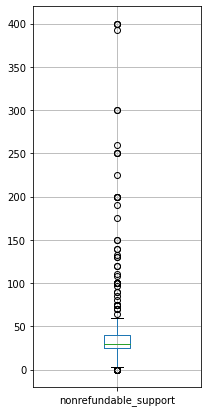

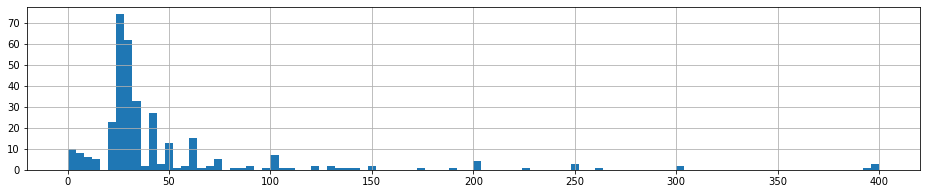

In [74]:
desc_plot('nonrefundable_support')

На первый взгляд есть аномалии у верхних границ. Но так как в киноиндустрии нет ожидаемого значения денежной поддержки, этот столбец оставим без изменений.  

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26.500000,79.411900,Министерство культуры,8.1,"драма,мелодрама",0.365354
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26.000000,37.142857,Министерство культуры,NaN,NaN,0.028140
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107.847945,176.023490,Фонд кино,5.3,"комедия,фантастика",19.957031


count     332.000000
mean      127.229717
std       188.588333
min         0.000000
25%        42.000000
50%        68.649916
75%       141.985320
max      2305.074303
Name: budget, dtype: float64

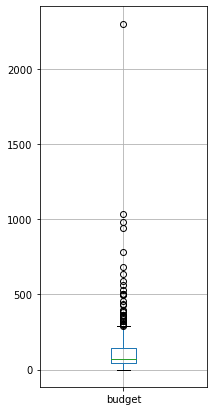

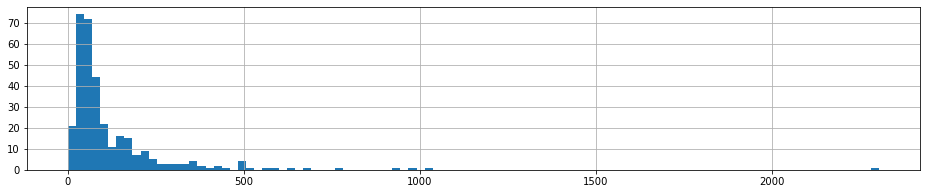

In [75]:
desc_plot('budget')

In [76]:
data[data['budget'] == 0]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23.000000,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10.234016
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75.000000,0.0,Фонд кино,6.6,драма,446.163511
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10.0,70.000000,0.0,Фонд кино,7.8,"боевик,драма,криминал",196.572438
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20.0,0.000000,0.0,Фонд кино,6.2,"комедия,фэнтези",67.418975
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60.0,100.000000,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184.487551
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59.000000,0.0,Фонд кино,6.3,"комедия,драма",1.957739
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35.000000,0.0,Фонд кино,5.1,"комедия,мелодрама",72.937783
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6.000000,0.0,Министерство культуры,4.3,комедия,15.362931
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19.0,51.000000,0.0,Фонд кино,6.3,"комедия,мелодрама",70.299052
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250.000000,0.0,Фонд кино,5.6,фантастика,1038.321489


На первый взгляд нет никакой связи между столбцами, где `budget` равен нулю. Нулевые значения в этом столбце можно заменить значением суммы государственной поддержки. 

In [77]:
data['budget'].where(~(data['budget'] == 0), other=data['refundable_support'] + data['nonrefundable_support'], inplace=True)

Проверим, есть ли столбцы, где бюджет меньше суммы государственной поддержки. 

In [78]:
data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]['budget'].count()

0

Теперь со столбцом `budget` все в порядке. 

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",0.00270
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.0,"мелодрама,комедия",0.00036
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,0.00042


count    3158.000000
mean       76.478696
std       240.353123
min         0.000000
25%         0.086239
50%         2.327988
75%        23.979671
max      3073.568691
Name: box_office, dtype: float64

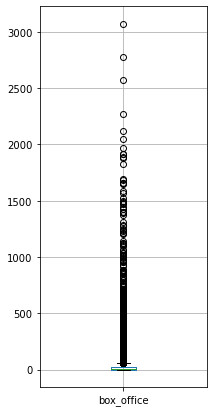

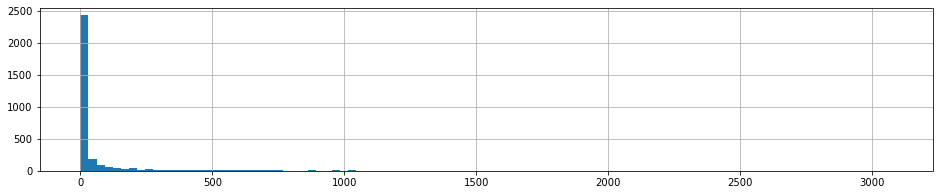

In [79]:
desc_plot('box_office')

В столбце `box_office` подозрительно низкие значения. Далее рассмотрим их подробнее. 

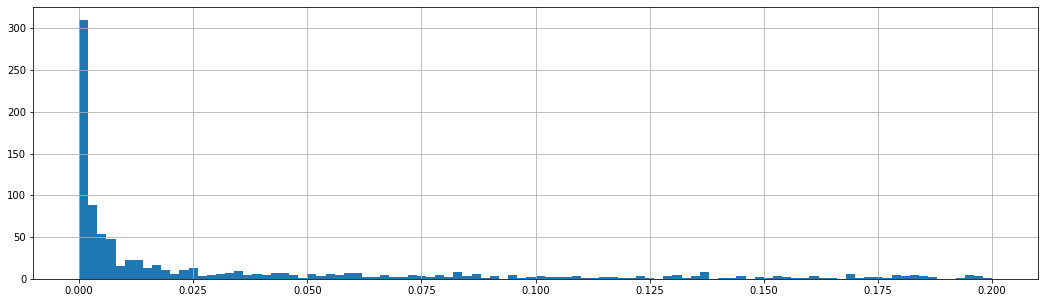

In [80]:
data[data['box_office'] != 0]['box_office'].hist(figsize=(18,5), bins=100, range=(0, 0.2));

In [81]:
data[data['box_office'] < 0.0150]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",0.002700
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.0,"мелодрама,комедия",0.000360
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,0.000420
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.7,"комедия,мелодрама,криминал",0.000380
38,Мужики!..,111007213,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.1,драма,0.001165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5378,ШПИОН,111009411,2011-12-09 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова",Россия,А.Андрианов,"С.Шумаков, Л.Верещагин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"боевик,комедия,криминал",0.005405
5386,ВОИН.com,111004411,2011-07-04 12:00:00+00:00,Художественный,"ООО ""Культурные инициативы""",Россия,Е.Бычкова,"В.Малышев, А.Малышев",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,4.7,комедия,0.000465
5387,Кунг-фу Панда 2.,224021411,2011-11-15 12:00:00+00:00,Анимационный,ДримУоркс Анимэйшн,США,Дженнифер Ю,"Мелисса Кобб, Джонатан Айбел, Гленн Бергер",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.4,"мультфильм,фэнтези,боевик",0.009270
6579,Время собирать цветы,112025118,2019-01-01 12:00:00+00:00,Документальный,"ООО ""Краеведофф""",Россия,Г.Щерба,О.Ракшин,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,0.007175


Я не могу сделать предположение, почему так много фильмов получили такие низкие значения сборов. Возможно, это какая-то ошибка в выгрузке или подсчете данных. Так как данных с указанными значениями сборов и так немного, будем анализировать как есть. 

### Шаг 2.6. Добавление новых столбцов. 

In [83]:
# добавим столбец с годом выхода фильма в прокат
data['year_of_premiere'] = data['show_start_date'].dt.year

# добавим столбец с именем и фамилией главного режиссера 
data['main_director'] = data['director'].str.split(',').str[0]
data['main_director'] = data['main_director'].str.strip()

# добавим столбец с основным жанром
data['main_genre'] = data['genres'].str.split(',').str[0]
data['main_genre'] = data['main_genre'].str.strip()

# добавим столбец с долей господдержки от бюджета
data['ratio_refundable_to_budget'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_of_premiere,main_director,main_genre,ratio_refundable_to_budget
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN


## Шаг 3. Исследовательский анализ. 

### Шаг 3.1. Исследование количества фильмов по годам. 

In [84]:
# создадим таблицу с количеством фильмов в кинотеатрах по годам 
films_per_year = data.groupby('year_of_premiere')['box_office'].count().to_frame()

# создадим вторую таблицу с долей фильмов в кинотеатрах от общего числа 
films_per_year_ratio = (data[['year_of_premiere','box_office']]
        .groupby('year_of_premiere')
        .apply(lambda x : x['box_office'].apply(pd.notna).mean()) * 100
        ).to_frame().reset_index()

# объединим таблицы и приведем к удобному виду
films_per_year = films_per_year.merge(films_per_year_ratio, how='left', on='year_of_premiere')
films_per_year.rename(columns={0: 'films_in_cinema_part', 'box_office': 'films_in_cinema'}, inplace=True)
films_per_year['films_in_cinema_part'] = round(films_per_year['films_in_cinema_part'], 1)
films_per_year

,year_of_premiere,films_in_cinema,films_in_cinema_part
0,2010,105,10.7
1,2011,109,17.5
2,2012,128,21.6
3,2013,184,29.2
4,2014,279,34.6
5,2015,465,66.0
6,2016,526,64.3
7,2017,357,70.7
8,2018,475,53.3
9,2019,530,57.0


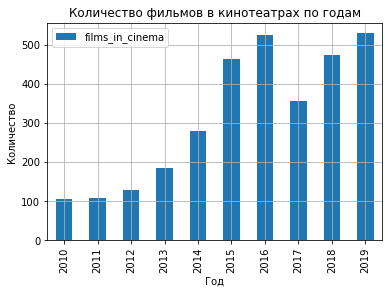

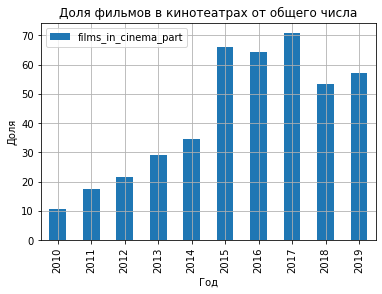

,year_of_premiere,films_in_cinema,films_in_cinema_part
year_of_premiere,1.000000,0.908732,0.864893
films_in_cinema,0.908732,1.000000,0.902095
films_in_cinema_part,0.864893,0.902095,1.000000


In [85]:
# построим графики и посчитаем корреляцию 

films_per_year.plot(kind='bar', y='films_in_cinema', x='year_of_premiere', grid=True);
plt.title('Количество фильмов в кинотеатрах по годам');
plt.xlabel('Год');
plt.ylabel('Количество');
plt.show()

films_per_year.plot(kind='bar', y='films_in_cinema_part', x='year_of_premiere', grid=True);
plt.title('Доля фильмов в кинотеатрах от общего числа');
plt.xlabel('Год');
plt.ylabel('Доля');
plt.show()

films_per_year.corr()

Видно, что с годами количество фильмов в прокате увеличивается, как и доля от общего количеста. Особенно высокий прирост виден после 2014 года, а в 2017 году количество фильмо снизилось, хотя доля от общего количечтва остается высокой. 

### Шаг 3.2. Исследование суммы сборов по годам. 

year_of_premiere
2010        2.428654
2011       14.102765
2012        6.955423
2013       29.799706
2014     7444.951859
2015    39497.365196
2016    47866.299742
2017    48563.707218
2018    49668.403134
2019    48425.708780
Name: box_office, dtype: float64

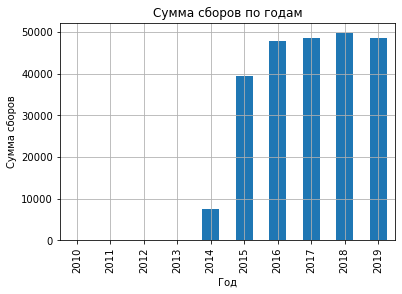

In [86]:
# создадим таблицу с суммой сборов по годам 
box_per_year = data.groupby('year_of_premiere')['box_office'].sum()
display(box_per_year)

# построим график
box_per_year.plot(x=box_per_year.index, y=box_per_year.values, kind='bar', grid=True)
plt.title('Сумма сборов по годам');
plt.xlabel('Год');
plt.ylabel('Сумма сборов');
plt.show()

Данных с 2010 по 2014 очень мало, а с 2015 виден скачок. Предположу, что это связано с некорректной выгрузкой данных с 2010 по 2014 год. 

Интресно, что с 2016 года сумма сборов практически не меняется, хотя на других графиках видно, как количество фильмов в кинотеатрах растет c 2014 года.

### Шаг 3.3. Подсчет средней и медианной суммы сборов по годам. 

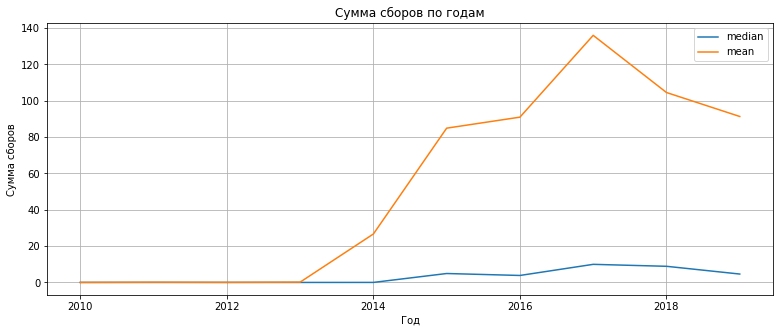

In [87]:
# создадим сводную таблицу
box_per_year_mean = data.pivot_table(index='year_of_premiere', values='box_office', aggfunc=['median', 'mean'])

# переименуем столбцы
box_per_year_mean.columns = ['median', 'mean']

# построим график
box_per_year_mean.plot(kind='line', grid=True, figsize=(13,5))
plt.title('Сумма сборов по годам');
plt.xlabel('Год');
plt.ylabel('Сумма сборов');


Здесь мы видим, что среднее значение и медиана сильно отличаются. Для киносборов нормально, когда присутствуют аномально высокие значения. Так же, как и на других графиках, видно, что самым успешным был 2017 год. 

### Шаг 3.4. Исследование влияния возрастного ограничения фильма на его сборы в 2015-2019гг. 

In [88]:
# создадим таблицу с нужными данными
age_for_box = data.query('year_of_premiere > 2014').groupby(['year_of_premiere', 'age_restriction'])['box_office'].agg('sum').reset_index()

age_for_box

,year_of_premiere,age_restriction,box_office
0,2015,«0+» - для любой зрительской аудитории,379.054578
1,2015,«12+» - для детей старше 12 лет,13616.082009
2,2015,«16+» - для детей старше 16 лет,11368.120870
3,2015,«18+» - запрещено для детей,5432.308367
4,2015,«6+» - для детей старше 6 лет,8701.799371
5,2016,«0+» - для любой зрительской аудитории,150.228849
6,2016,«12+» - для детей старше 12 лет,12204.446524
7,2016,«16+» - для детей старше 16 лет,16664.548542
8,2016,«18+» - запрещено для детей,6793.929819
9,2016,«6+» - для детей старше 6 лет,12053.146008


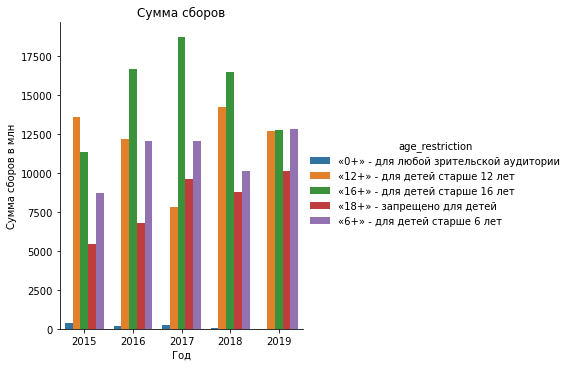

In [89]:
# построим график

age_plot = sns.catplot(x='year_of_premiere', y='box_office', hue='age_restriction', data=age_for_box, kind='bar');
plt.title('Сумма сборов');
plt.xlabel('Год');
plt.ylabel('Сумма сборов в млн');

Кино 16+ лидирует в сборах почти каждый год. Также на графике видно, что есть тенденция к равномерному распределению сборов относительно возрастного ограничения. Это может быть связано с возросших общим количеством фильмов для каждого возраста. 

## Шаг 4. Исследование фильмов, получивших государственную поддержку.

In [90]:
# соберем нужные данные в отдельный датафрейм
data_fund = data[data['budget'].isna() == False].copy(deep=True)
data_fund.drop(columns=['film_studio', 'director', 'producer', 'genres', 'production_country', 'ratio_refundable_to_budget', 'pu_number', 'show_start_date', 'main_director'], inplace=True)
data_fund.head()

,title,type,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year_of_premiere,main_genre
1281,Пока еще жива,Художественный,«16+» - для детей старше 16 лет,0.0,26.500000,79.411900,Министерство культуры,8.1,0.365354,2013,драма
1448,Бесславные придурки,Художественный,«12+» - для детей старше 12 лет,0.0,26.000000,37.142857,Министерство культуры,NaN,0.028140,2014,NaN
1498,Невидимки,Художественный,«12+» - для детей старше 12 лет,0.0,107.847945,176.023490,Фонд кино,5.3,19.957031,2013,комедия
1524,БЕРЦЫ,Художественный,«16+» - для детей старше 16 лет,0.0,28.000000,40.574140,Министерство культуры,4.2,0.055918,2014,драма
1792,Братья Ч,Художественный,«16+» - для детей старше 16 лет,0.0,25.000000,40.015122,Министерство культуры,6.4,0.232100,2014,драма


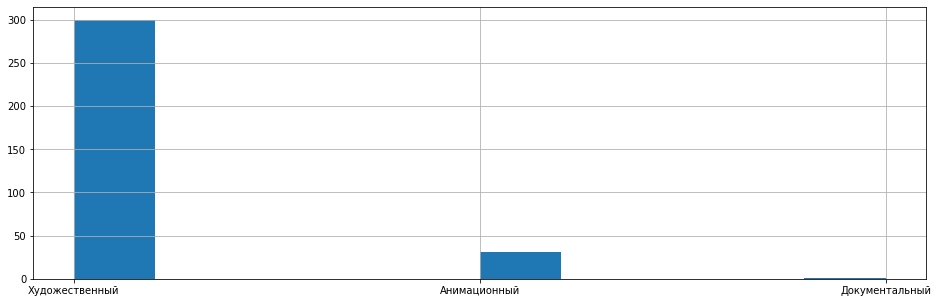

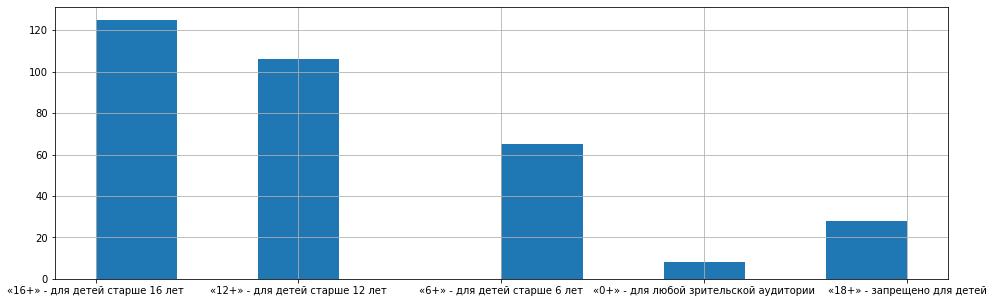

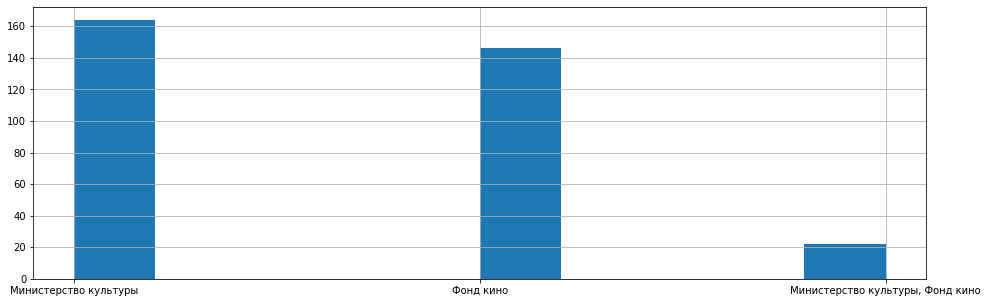

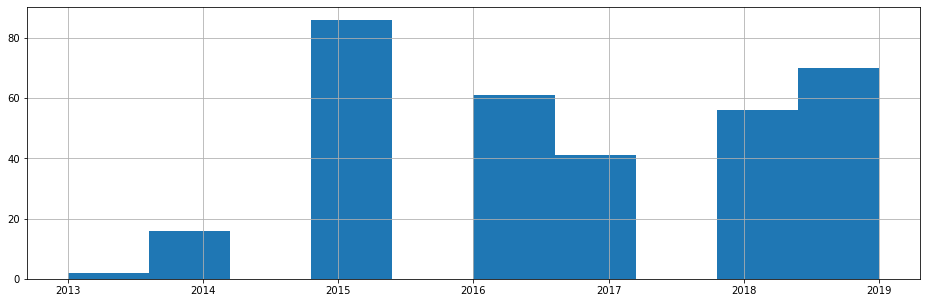

In [91]:
# изучим столбец c категориальными переменными

columns = ['type', 'age_restriction', 'financing_source', 'year_of_premiere']

for column in columns:
    data_fund[column].hist(figsize=(16,5));
    plt.show();

Государственную поддержку получают преимущественно художественные фильмы с ограничением 16+. Это совпадает с данными по общей выборке, т.е. государственную поддержку получают популярные категории фильмов. 

Что касается источника финансирования, тут Министерство культуры немного опережает Фонд кино, но в целом оба фонда оказывают одинаковый вклад в киноиндустрию. 

Большое количество фильмов было профинансировано в 2015 году, после чего их количество стало снижаться, однако с 2018 года государство снова начало финансировать киноиндустрию.

count    316.000000
mean       6.020886
std        1.148943
min        1.000000
25%        5.300000
50%        6.200000
75%        6.700000
max        9.400000
Name: round_ratings, dtype: float64

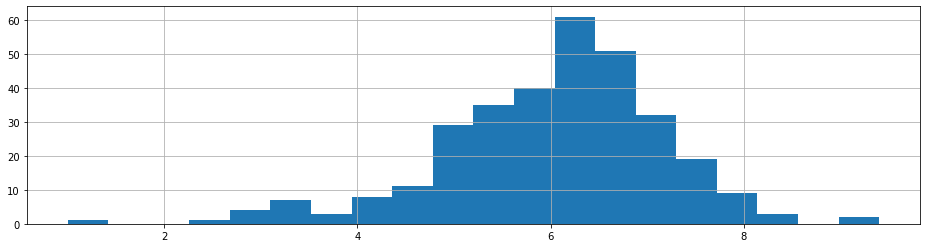

In [92]:
# для изучения столбца с рейтингом округлим значнения
data_fund['round_ratings'] = round(data_fund['ratings'], 1)

# построим график
data_fund['round_ratings'].hist(figsize=(16,4), bins=20);
data_fund['round_ratings'].describe()

Большинство фильмов с государственной поддержкой получают рейтинг от 6 до 7 (по версии КиноПоиска). 

In [93]:
# посмтрим столбец жанра 
data_fund['main_genre'].value_counts().head(10)

драма         93
комедия       74
мультфильм    31
триллер       15
мелодрама     15
фэнтези       11
фантастика    11
ужасы         10
военный        9
семейный       7
Name: main_genre, dtype: int64

Самыми популярными жанрами среди фильмов с господдержкой являются драма и комедия. 

In [94]:
# для анализа столбцов с суммой государсвенной поддержки создадим дополнительные столбцы
data_fund['all_support'] = data_fund['nonrefundable_support'] + data_fund['refundable_support']
data_fund['percent_support'] = round(data_fund['all_support'] / data_fund['budget'] * 100, 0)
data_fund['profit'] = data_fund['box_office'] - data_fund['budget']


print('Количество фильмов с государственной поддержкой, которые окупились', data_fund[data_fund['profit'] > 0]['profit'].count())
print('Количество фильмов с государственной поддержкой, которые не окупились', data_fund[data_fund['profit'] <= 0]['profit'].count())
print(f'Процент окупившихся фильмов с государственной поддержкой', round(data_fund[data_fund['profit'] > 0]['profit'].count() / data_fund[data_fund['profit'] <= 0]['profit'].count() * 100, 2), '%')
      

Количество фильмов с государственной поддержкой, которые окупились 79
Количество фильмов с государственной поддержкой, которые не окупились 239
Процент окупившихся фильмов с государственной поддержкой 33.05 %


In [95]:
# рассмотрим фильмы, которые окупились
data_fund_profit = data_fund[data_fund['profit'] > 0].copy(deep=True)
data_fund_profit

,title,type,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year_of_premiere,main_genre,round_ratings,all_support,percent_support,profit
1869,А зори здесь тихие..._,Художественный,«12+» - для детей старше 12 лет,50.0,100.0,220.588394,Фонд кино,8.5,249.166768,2015,драма,8.5,150.0,68.0,28.578374
1902,Призрак_.,Художественный,«6+» - для детей старше 6 лет,0.0,75.0,139.551503,Фонд кино,7.0,352.804320,2015,триллер,7.0,75.0,54.0,213.252817
1986,Елки Лохматые,Художественный,«6+» - для детей старше 6 лет,26.0,30.0,80.000000,Фонд кино,5.0,121.225634,2014,семейный,5.0,56.0,70.0,41.225634
2004,Снежная Королева 2: Перезаморозка,Анимационный,«0+» - для любой зрительской аудитории,30.0,40.0,252.489571,Фонд кино,6.5,313.489846,2014,мультфильм,6.5,70.0,28.0,61.000275
2057,Дуxless 2,Художественный,«16+» - для детей старше 16 лет,0.0,75.0,75.000000,Фонд кино,6.6,446.163511,2015,драма,6.6,75.0,100.0,371.163511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6970,Верность,Художественный,«18+» - запрещено для детей,0.0,30.0,46.300000,Министерство культуры,6.2,97.637352,2019,драма,6.2,30.0,65.0,51.337352
6989,Давай разведемся!,Художественный,«12+» - для детей старше 12 лет,0.0,25.0,38.000000,Министерство культуры,5.9,103.098291,2019,комедия,5.9,25.0,66.0,65.098291
7451,Фиксики против кработов,Анимационный,«6+» - для детей старше 6 лет,80.0,40.0,270.000000,Фонд кино,7.5,387.590522,2019,мультфильм,7.5,120.0,44.0,117.590522
7454,Холоп,Художественный,«12+» - для детей старше 12 лет,25.0,35.0,160.000000,Фонд кино,6.8,3073.568691,2019,комедия,6.8,60.0,38.0,2913.568691


In [96]:
# найдем самый успешный проект
print('Самый успешный фильм с государственной поддержкой:')
display(data_fund_profit[data_fund_profit['profit'] == data_fund_profit['profit'].max()])

Самый успешный фильм с государственной поддержкой:


,title,type,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year_of_premiere,main_genre,round_ratings,all_support,percent_support,profit
7454,Холоп,Художественный,«12+» - для детей старше 12 лет,25.0,35.0,160.0,Фонд кино,6.8,3073.568691,2019,комедия,6.8,60.0,38.0,2913.568691


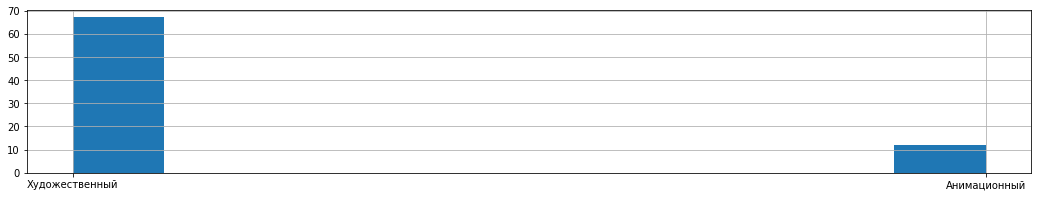

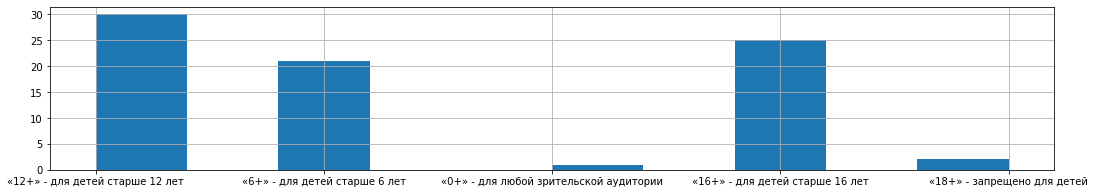

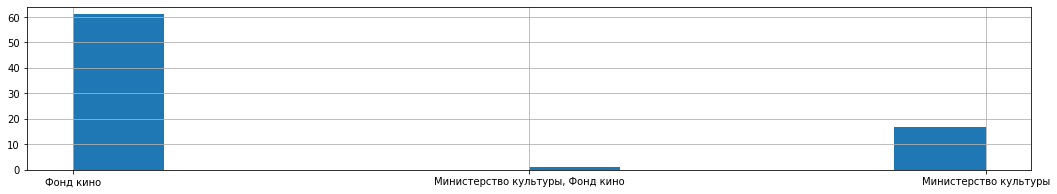

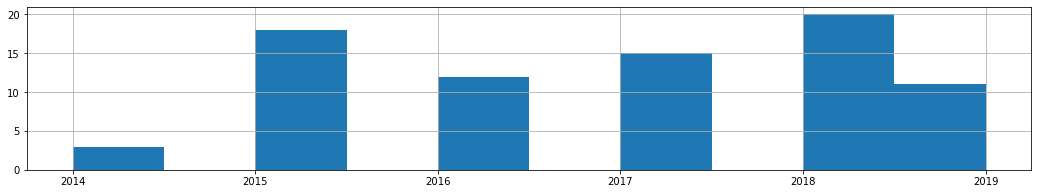

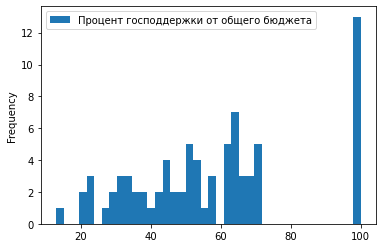

In [97]:
# проанализируем успешные проекты 
columns = ['type', 'age_restriction', 'financing_source', 'year_of_premiere']

for column in columns:
    data_fund_profit[column].hist(figsize=(18,3));
    plt.show();
    
data_fund_profit['ratio_fund'] = data_fund_profit['all_support'] / data_fund_profit['budget'] * 100
data_fund_profit['ratio_fund'].plot(kind='hist', bins=40, legend=True, label='Процент господдержки от общего бюджета');

In [98]:
print('Самые популярные жанры:')
print(data_fund_profit['main_genre'].value_counts().head(3))
print()
print('Cредний рейтинг фильмов:', data_fund_profit['ratings'].median())

Самые популярные жанры:
комедия       31
драма         14
мультфильм    12
Name: main_genre, dtype: int64

Cредний рейтинг фильмов: 6.2


На графиках видно, что самыми успешными проектами были художественные фильмы с ограничением возраста 12+ в жанре "комедия". 
Подавляющее количество таких фильмов были проспонсировано Фондом кино, а самыми успешными годами были 2015-ый и 2018-ый. Также можно отметить, что государственная поддержка благоприятно сказывается на успехе фильма. 

## Шаг 5. Вывод. 

В качестве преобработки данных мы провели:
- преобразование типов данных
- обработку дубликатов
- ошибки в написании значений категориальных переменных 
Мы обнаружили, что учет даты выхода в прокат идет только с 2010 года, а также, что среди в столбце сборов фильма есть подозрительно низкие значения. Необходимо проверить, правильно ли идет выгрузка данных. 

В результате анализа датасета, выяснилось, что количество фильмов в прокате с каждым годом растет( за исключением 2017 года), хотя сумма сборов остается стабильной с 2016 года. Кино 16+ лидирует в сборах почти каждый год, хотя есть тенденция к равномерному распределению сборов относительно возрастного ограничения. Это может быть связано с возросших общим количеством фильмов для каждого возраста. 

В результате анализа фильмов, получивших государственную поддержку, мы выяснили, что государственную поддержку получают преимущественно художественные фильмы с ограничением 16+.

Министерство культуры и Фонд кино привносят практически одинаковый вклад в киноиндустрию, но фильмы Фонда кино сильно опережают Министрество культуры по окупаемости. 

Большое количество фильмов было профинансировано в 2015 году, после чего их количество стало снижаться, однако с 2018 года государство снова начало финансировать киноиндустрию.

Самыми популярными жанрами оказались драма и комедия, и в среднем фильмы получают рейтинг 6 по версии КиноПоиска. 

Среди фильмов с государственной поддержкой, которые окупились, (33% от общего числа) самыми популярными оказались "семейные фильмы" - комедия с ограничением возраста 12+. 

Самым успешным проектом за все время стал фильм "Холоп. 